# Artificial Neural Network

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
tf.__version__

'2.3.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [3]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [4]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [5]:
print(y)

[1 0 1 ... 1 1 0]


### Encoding categorical data

Label Encoding the "Gender" column

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [7]:
print(X[:, 2])

[0 0 0 ... 0 1 0]


One Hot Encoding the "Geography" column

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [9]:
print(X[:, 1])

[0.0 0.0 0.0 ... 0.0 1.0 0.0]


### Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [12]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [13]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [14]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [15]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [16]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [17]:
history = ann.fit(X_train, y_train, validation_split = 0.1, batch_size = 32, epochs = 100)

Epoch 1/100
225/225 [==============================] - 1s 3ms/step - loss: 0.5944 - accuracy: 0.7556 - val_loss: 0.5149 - val_accuracy: 0.7962
Epoch 2/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4778 - accuracy: 0.7982 - val_loss: 0.4545 - val_accuracy: 0.8150
Epoch 3/100
225/225 [==============================] - 1s 2ms/step - loss: 0.4439 - accuracy: 0.8104 - val_loss: 0.4336 - val_accuracy: 0.8250
Epoch 4/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4316 - accuracy: 0.8153 - val_loss: 0.4234 - val_accuracy: 0.8225
Epoch 5/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4253 - accuracy: 0.8206 - val_loss: 0.4147 - val_accuracy: 0.8388
Epoch 6/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4206 - accuracy: 0.8221 - val_loss: 0.4092 - val_accuracy: 0.8375
Epoch 7/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4174 - accuracy: 0.8249 - val_loss: 0.4041 - val_accuracy: 0.8425

# Visualization of the Loss of training

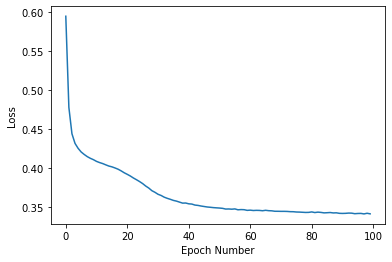

In [18]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss")
plt.plot(history.history['loss'])

# Visualization of the Accuracy of training

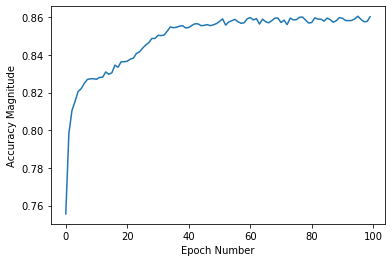

In [19]:
plt.xlabel('Epoch Number')
plt.ylabel("Accuracy Magnitude")
plt.plot(history.history['accuracy'])

# Visualization of the Loss of validation VS loss of training

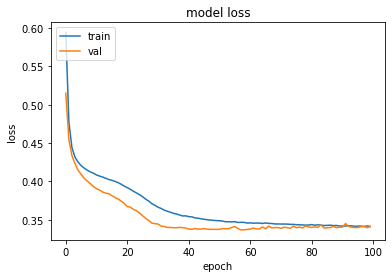

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Visualization of the Accuracy of validation VS Accuracy of training

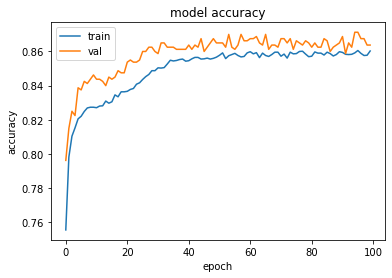

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Part 4 - Making the predictions and evaluating the model

### Predicting the Test set results

In [111]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

## Model Performance Evaluation

In [112]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n\n{cm}')

Confusion Matrix:

[[1525   70]
 [ 209  196]]


In [113]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(accuracy*100)}%')

Accuracy: 86%


In [114]:
tp, fp, fn, tn = cm.ravel()
TPR = tp/(tp+fn)
TNR = tn/(tn+fp)
print(f'TPR: {round(TPR*100)}%\n'
      f'TNR: {round(TNR*100)}%')

TPR: 88%
TNR: 74%


In [115]:
from sklearn.metrics import classification_report
target_names = ['stay', 'leave']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        stay       0.88      0.96      0.92      1595
       leave       0.74      0.48      0.58       405

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



## ROC
The ROC curve helps us find the threshold where the TPR is high and FPR is low i.e. misclassifications are low. Therefore, ROC curves should be used to determine the optimal probability threshold for a classification model.

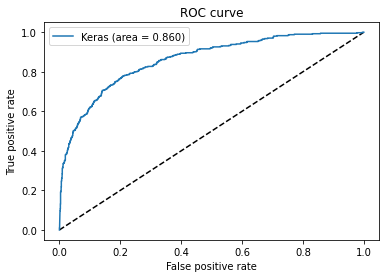

In [78]:
from sklearn.metrics import roc_curve, auc

y_pred_ravel = ann.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_ravel)
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [79]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_ravel)

0.8604094585703781

### Predicting the result of a single observation

**Solution**

**Homework**

Use our ANN model to predict if the customer with the following informations will leave the bank:

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer ?

In [25]:
def single_predictor(single_features):
    features_list = []
    for sublist in single_features.values():
        if type(sublist) == list:
            for item in sublist:
                features_list.append(item)
        else:
            features_list.append(sublist)
    transform_features = sc.transform([features_list])
    my_prediction = ann.predict(transform_features)
    print(my_prediction > 0.5)

In [26]:
single_featurs = {
    'Geography': [1, 0, 0] ,
    'Credit Score': 600,
    'Gender': 1,
    'Age': 40,
    'Tenure': 3,
    'Balance': 60000,
    'Number of Products': 2,
    'Credit Card': 1,
    'Active Member': 1,
    'Salary': 50000,
}

In [27]:
# print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)
single_predictor(single_featurs)

[[False]]
